In [38]:
import pandas as pd

In [39]:
data = pd.read_csv('data/hackaton_students_train.csv')

In [ ]:
# train valid split
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, test_size=0.2, random_state=42, stratify=data['target'])  




In [41]:
data['y'] = (
    data['graphic_design'].astype(str) +
    data['top_1_section'].astype(str) +
    data['top_2_section'].astype(str) +
    data['top_3_section'].astype(str)   
)
data

,id,booking_adult_count,booking_child_count,booking_destination_airport_code,booking_id,booking_infant_count,booking_leg_count,booking_market,booking_origin_airport_code,booking_original_currency,...,pnr,preffered_language,request_dttm,request_id,clicked,graphic_design,top_1_section,top_2_section,top_3_section,y
0,105529,1,0,TBS,6386840,0,2,GE,WAW,GEL,...,40faefe514be47b38cea3be065583d7f,en_gb,2014-03-02T21:13:05.030Z,ee37548ce2a74b99b41d67f4d2a138fd,0,C,6,3,0,C630
1,28386,1,0,WAW,6842736,0,2,US,EWR,USD,...,7fafefddde544aba95c69552cfbadd51,en_gb,2013-10-09T11:08:14.112Z,f083457969dd46d2ada761198096ecc4,1,B,4,3,5,B435
2,107663,1,0,BEG,3164316,0,2,PL,SZZ,NaN,...,6240c081718e4439a3174ac38a2c9c45,en_gb,2014-03-08T08:15:38.344Z,9df9a894f4374dfba0d8811dd99c1b1e,0,C,3,6,0,C360
3,24881,1,0,BOM,3835074,0,1,SE,WAW,NaN,...,231c99e3d0644366827e91276296e3cc,en_gb,2013-10-06T09:09:48.597Z,89c95fa040db42d4a1982c7901128585,1,A,3,1,2,A312
4,90383,1,0,OTP,5962948,0,2,PL,OSL,PLN,...,4854301527cf48f7a32c9625a154874b,en_gb,2014-01-07T14:14:06.568Z,d44b65a240374e61867039b37c98f9a0,1,B,3,4,5,B345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84944,7634,1,0,WAW,5494177,0,2,US,EWR,USD,...,d86c510a2b114288bc6ca23cbdb20731,pl_pl,2013-09-21T08:09:47.626Z,c96bd1b541614661a3ec092f4594e5c1,1,B,4,3,5,B435
84945,67152,1,0,ICN,4024574,0,2,PL,WRO,PLN,...,882f81dc62264d18be14b0c346249888,en_gb,2013-11-16T11:11:36.066Z,22e4542ce44049da8a6f20ed6238faf0,1,B,3,4,5,B345
84946,94614,2,0,DEL,9014936,0,2,PL,WAW,PLN,...,828a20846c724728ac8a0760efdf6df6,pl_pl,2014-01-27T22:12:08.965Z,2532b32403f2417fb5717281ddadb9df,1,C,3,6,0,C360
84947,1031,2,0,DBV,5195800,0,2,PL,WAW,PLN,...,0e0f7bb498134733a28aae066201993d,pl_pl,2013-09-15T12:34:09.192Z,e5d4b884d3f24c54a47162af74a1ad09,0,A,3,2,1,A321


In [42]:
data = data.drop(columns=['graphic_design', 'top_1_section', 'top_2_section', 'top_3_section'])



F1 score (macro): 0.1015

Classification report:
              precision    recall  f1-score   support

           0       0.11      0.13      0.12      1705
           1       0.10      0.11      0.11      1686
           2       0.10      0.11      0.11      1702
           3       0.10      0.10      0.10      1685
           4       0.10      0.11      0.11      1696
           5       0.09      0.09      0.09      1702
           6       0.11      0.11      0.11      1717
           7       0.10      0.09      0.10      1707
           8       0.10      0.09      0.09      1706
           9       0.09      0.08      0.08      1684

    accuracy                           0.10     16990
   macro avg       0.10      0.10      0.10     16990
weighted avg       0.10      0.10      0.10     16990



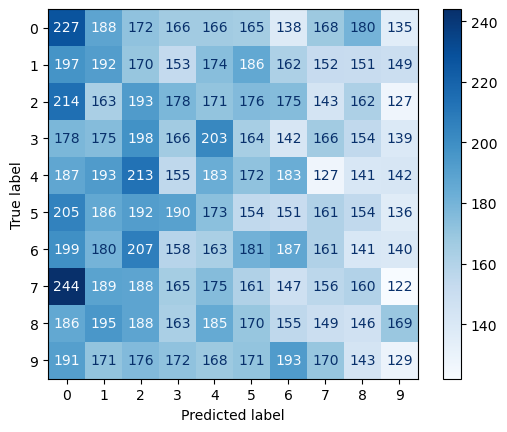

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# 1. Przygotowanie danych
df = data.copy()

# Oddziel cechy od celu
X = df.drop(columns=['y'])
y = df['y']

# 2. Zakoduj cechy kategoryczne bezpiecznie (OrdinalEncoder)
cat_cols = X.select_dtypes(include='object').columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[cat_cols] = encoder.fit_transform(X[cat_cols])

# 3. Zakoduj etykiety klas (jeśli tekstowe)
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 4. Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Trening modelu
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Predykcja i ocena
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1 score (macro): {f1:.4f}")

# 7. Opcjonalnie: pełny raport
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# 8. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [13]:
data.describe()

,id,booking_adult_count,booking_child_count,booking_id,booking_infant_count,booking_leg_count,booking_pax_count,booking_reservation_month,booking_segments_count,booking_window_w,...,leg_duration_h,leg_first_leg_flg,leg_hours_to_departure,leg_last_leg_flg,leg_number,leg_stopover_time_h,clicked,top_1_section,top_2_section,top_3_section
count,84949.000000,84949.000000,84949.000000,8.494900e+04,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,...,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000,84949.000000
mean,57911.407715,1.462477,0.057976,5.503856e+06,0.012525,1.734335,1.532979,7.655476,2.248891,5.915667,...,4.890475,0.631720,70.753111,0.635911,1.323312,-6240.464408,0.327961,3.099636,3.402453,2.505821
std,33694.182307,1.479481,0.290311,2.593980e+06,0.113829,0.449142,1.537790,3.144837,0.952161,6.907565,...,5.478724,0.482341,2.292069,0.481177,0.469752,4980.874560,0.469473,1.371828,1.498091,1.746691
min,0.000000,0.000000,0.000000,1.000143e+06,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,61.000000,0.000000,1.000000,-9999.000000,0.000000,1.000000,1.000000,0.000000
25%,28606.000000,1.000000,0.000000,3.251179e+06,0.000000,1.000000,1.000000,7.000000,2.000000,2.000000,...,2.000000,0.000000,71.000000,0.000000,1.000000,-9999.000000,0.000000,3.000000,2.000000,1.000000
50%,57711.000000,1.000000,0.000000,5.503001e+06,0.000000,2.000000,1.000000,9.000000,2.000000,4.000000,...,3.000000,1.000000,71.000000,1.000000,1.000000,-9999.000000,0.000000,3.000000,3.000000,3.000000
75%,87172.000000,2.000000,0.000000,7.740747e+06,0.000000,2.000000,2.000000,10.000000,2.000000,7.000000,...,5.000000,1.000000,71.000000,1.000000,2.000000,99.000000,1.000000,4.000000,5.000000,4.000000
max,116328.000000,96.000000,5.000000,9.999956e+06,4.000000,4.000000,96.000000,12.000000,6.000000,53.000000,...,45.000000,1.000000,80.000000,1.000000,3.000000,8771.000000,1.000000,6.000000,6.000000,5.000000


In [45]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import numpy as np

# Parametr lambda
custom_lambda = 0.5

# Dane (przykładowo)
df = data.copy()

# Przygotuj X i y
y = df['y']
X = df.drop(columns=['y'])

# Zakoduj cechy kategoryczne
cat_cols = X.select_dtypes(include='object').columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[cat_cols] = encoder.fit_transform(X[cat_cols])

# Zakoduj y
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Podziel dane
X_train, X_test, y_train, y_test, clicked_train, clicked_test = train_test_split(
    X, y, df['clicked'], test_size=0.2, random_state=42, stratify=y
)

# Przygotuj dataset dla LightGBM
train_data = lgb.Dataset(X_train, label=y_train, weight=clicked_train.values)
test_data = lgb.Dataset(X_test, label=y_test, weight=clicked_test.values)

# Custom loss function
def custom_loss_with_clicked(y_pred, dataset):
    y_true = dataset.get_label()
    clicked = dataset.get_weight()  # używamy clicked jako wagi

    n_classes = len(np.unique(y_true))
    y_pred = y_pred.reshape(-1, n_classes)

    # Obliczamy softmax
    probs = np.exp(y_pred) / np.exp(y_pred).sum(axis=1, keepdims=True)
    preds = np.argmax(probs, axis=1)

    # Liczymy stratę
    loss = 0
    for i in range(len(y_true)):
        is_correct = int(preds[i] == y_true[i])
        c = clicked[i]

        if c == 0:
            if is_correct:
                loss += custom_lambda
            else:
                loss += 0.1 * custom_lambda
        else:
            if is_correct:
                loss -= custom_lambda
            else:
                loss += 0.1 * custom_lambda

    return 'custom_loss', loss / len(y_true), False

# Parametry LightGBM
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y)),
    'metric': 'None',
    'verbosity': -1
}

# Trenowanie
model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    feval=custom_loss_with_clicked,
    num_boost_round=100
)

# Predykcja i ocena
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Oblicz F1 score
f1 = f1_score(y_test, y_pred_labels, average='macro')
print(f"F1 score (macro): {f1:.4f}")


F1 score (macro): 0.1019


In [ ]:
from L_score import L_score
y_true = data[['clicked', 'y']]
y_true

,y,clicked
0,C630,0
1,B435,1
2,C360,0
3,A312,1
4,B345,1
...,...,...
84944,B435,1
84945,B345,1
84946,C360,1
84947,A321,0
